<a href="https://colab.research.google.com/github/oguzhan-serttas/Assembly-80x86/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

In [6]:
df = df.drop('Id', axis = 1)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2649,2,84,0,0,0,0.0,0.304,21,0
2155,0,117,80,31,53,45.2,0.089,24,0
131,9,122,56,0,0,33.3,1.114,33,1
1754,9,145,88,34,165,30.3,0.771,53,1
2117,9,123,70,44,94,33.1,0.374,40,0
246,10,122,68,0,0,31.2,0.258,41,0
1896,1,99,58,10,0,25.4,0.551,21,0
607,1,92,62,25,41,19.5,0.482,25,0
2301,4,114,64,0,0,28.9,0.126,24,0
152,9,156,86,28,155,34.3,1.189,42,1


In [7]:
df.shape

(2768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2214, 8), (554, 8))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:3, :]

array([[ 0.06624022, -0.38205062, -0.26370701,  1.45902554,  0.17395182,
         0.33882074,  1.31121966, -0.61604209],
       [-0.8371839 , -0.10045187, -0.57434671,  0.96021724,  0.12897479,
         0.1534034 , -0.64738633, -0.86976266],
       [-0.53604253,  0.05599188, -1.09207955,  0.71081309,  0.76764866,
         1.24118513,  0.1403139 , -0.61604209]])

In [11]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [13]:
history = model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
70/70 [==============================] - 2s 4ms/step - loss: 0.5275 - accuracy: 0.7407 - precision: 0.6499 - recall: 0.5412
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7859 - precision: 0.7018 - recall: 0.6614
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7977 - precision: 0.7412 - recall: 0.6366
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8035 - precision: 0.7405 - recall: 0.6641
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7945 - precision: 0.7159 - recall: 0.6719
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8198 - precision: 0.7675 - recall: 0.6863
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8098 - precision: 0.7194 - recall: 0.7373
Epoch 8/100
70/70 [=============================

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

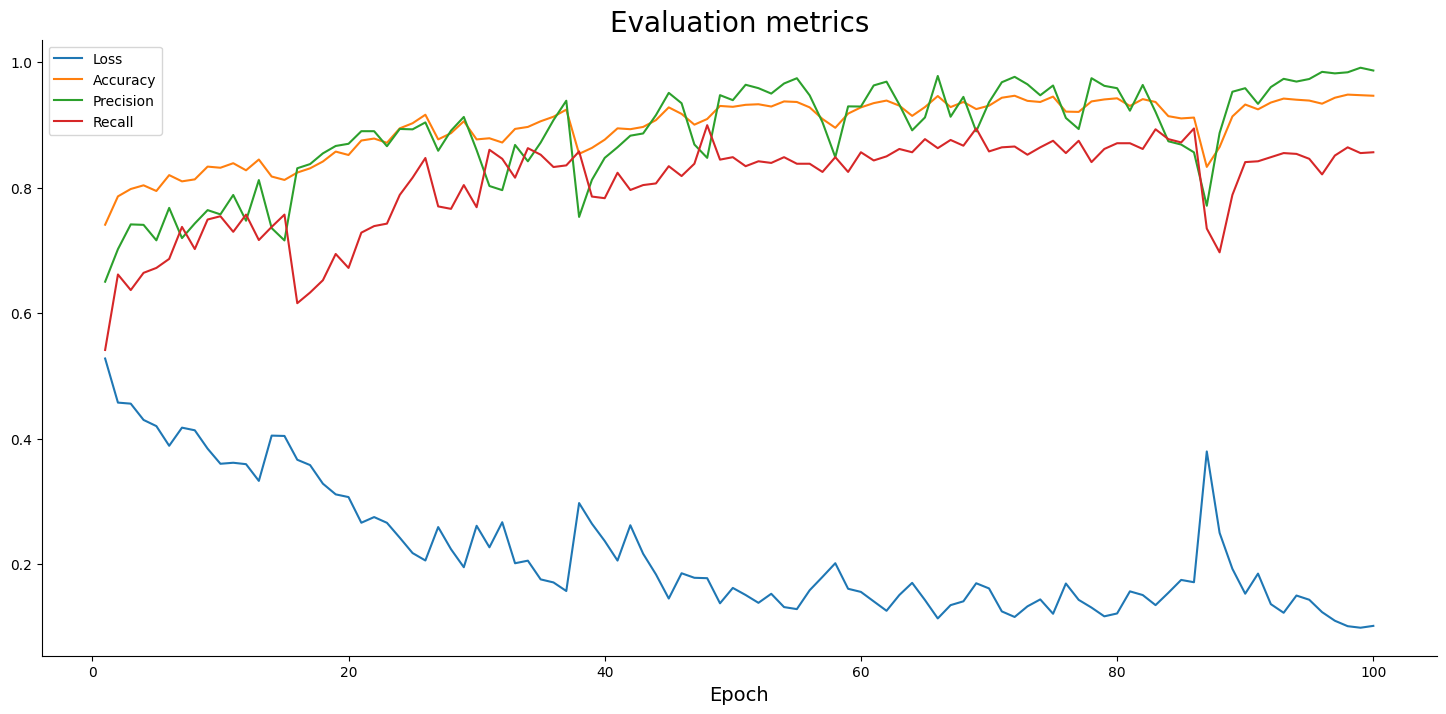

In [15]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [16]:
predictions = model.predict(X_test_scaled)
predictions

18/18 [==============================] - 0s 1ms/step


array([[9.49232628e-07],
       [3.54384094e-01],
       [3.54384094e-01],
       [2.45153520e-09],
       [1.00000000e+00],
       [1.83081365e-35],
       [3.90380415e-27],
       [0.00000000e+00],
       [9.72406951e-07],
       [1.00000000e+00],
       [9.85121207e-10],
       [1.86784127e-21],
       [0.00000000e+00],
       [3.56321179e-05],
       [9.99977887e-01],
       [2.97314051e-04],
       [9.99998748e-01],
       [5.94798708e-04],
       [3.54384094e-01],
       [3.54384094e-01],
       [1.00000000e+00],
       [1.54910095e-24],
       [9.99335766e-01],
       [3.39182719e-07],
       [1.00000000e+00],
       [9.99565065e-01],
       [1.83081365e-35],
       [9.99973953e-01],
       [1.44789989e-21],
       [1.39663573e-02],
       [3.54384094e-01],
       [3.54384094e-01],
       [3.54384094e-01],
       [2.92716874e-03],
       [7.57597576e-08],
       [6.36403337e-02],
       [4.30943292e-14],
       [3.17714424e-23],
       [3.54384094e-01],
       [6.29254943e-03],


In [17]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
prediction_classes[:20]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[352  15]
 [ 31 156]]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.92
Precision: 0.91
Recall: 0.83
